## Examen de certificación – Intento 4

### Descripción


Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset real. Utilizaremos el «Wine Quality Dataset» disponible en UCI Machine Learning Repository. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo, así como una comprensión de las consideraciones éticas y tecnológicas en el análisis de datos.

### Contexto y Descripción del Dataset

El «Wine Quality Dataset» contiene datos sobre las características químicas y físicas de diferentes muestras de vino tinto y blanco, así como su calidad, evaluada por expertos en una escala de 0 a 10. Este dataset es ampliamente utilizado en la investigación de modelos de clasificación y regresión debido a su naturaleza multifacética y su aplicación en la industria vinícola.

Diccionario de Datos:

1. fixed acidity: Acidez fija en g/dm³.
2. volatile acidity: Acidez volátil en g/dm³.
3. citric acid: Ácido cítrico en g/dm³.
4. residual sugar: Azúcar residual en g/dm³.
5. chlorides: Cloruros en g/dm³.
6. free sulfur dioxide: Dióxido de azufre libre en mg/dm³.
7. total sulfur dioxide: Dióxido de azufre total en mg/dm³.
8. density: Densidad en g/cm³.
9. pH: Nivel de pH.
10. sulphates: Sulfatos en g/dm³.
11. alcohol: Porcentaje de alcohol en % vol.
12. quality: Calidad del vino (variable objetivo, escala de 0 a 10).


In [1]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Cargar los datos del vino tinto
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Cargar los archivos CSV
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

## 1. Limpieza de Datos


### Exploracion inicial de datos

In [3]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Manejo de valores faltantes adecuadamente

In [7]:
utils.calculate_na_statistics(df_red)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1599,0,0.0
volatile acidity,1599,0,0.0
citric acid,1599,0,0.0
residual sugar,1599,0,0.0
chlorides,1599,0,0.0
free sulfur dioxide,1599,0,0.0
total sulfur dioxide,1599,0,0.0
density,1599,0,0.0
pH,1599,0,0.0
sulphates,1599,0,0.0


In [8]:
utils.calculate_na_statistics(df_white)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,4898,0,0.0
volatile acidity,4898,0,0.0
citric acid,4898,0,0.0
residual sugar,4898,0,0.0
chlorides,4898,0,0.0
free sulfur dioxide,4898,0,0.0
total sulfur dioxide,4898,0,0.0
density,4898,0,0.0
pH,4898,0,0.0
sulphates,4898,0,0.0


### Identificación y eliminación de valores duplicados

In [9]:
df_red.duplicated().sum()

240

In [10]:
df_red.drop_duplicates(inplace=True)

In [11]:
df_white.duplicated().sum()

937

In [12]:
df_white.drop_duplicates(inplace=True)

### Verificación y ajuste de tipos de datos

In [13]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [14]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


Los tipos de datos son correctos.

Corrección de inconsistencias en valores categóricos

No hay valores categoricos.

## 2. Exploracion de datos

Visualizaciones univariadas y multivariadas

In [15]:
# Visualización univariada: histogramas para cada variable numérica
def visualizar_univariadas(df, title="Distribuciones Univariadas"):
    df.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualización multivariada: mapa de calor para correlaciones
def visualizar_multivariadas(df, title="Mapa de Correlaciones"):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title, fontsize=16)
    plt.show()

# Diagramas de dispersión entre alcohol y calidad 
def scatterplot_alcohol_quality(df, title="Relación entre Alcohol y Calidad"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='alcohol', y='quality', alpha=0.7)
    plt.title(title, fontsize=14)
    plt.xlabel('Alcohol (%)')
    plt.ylabel('Calidad')
    plt.grid(True)
    plt.show()


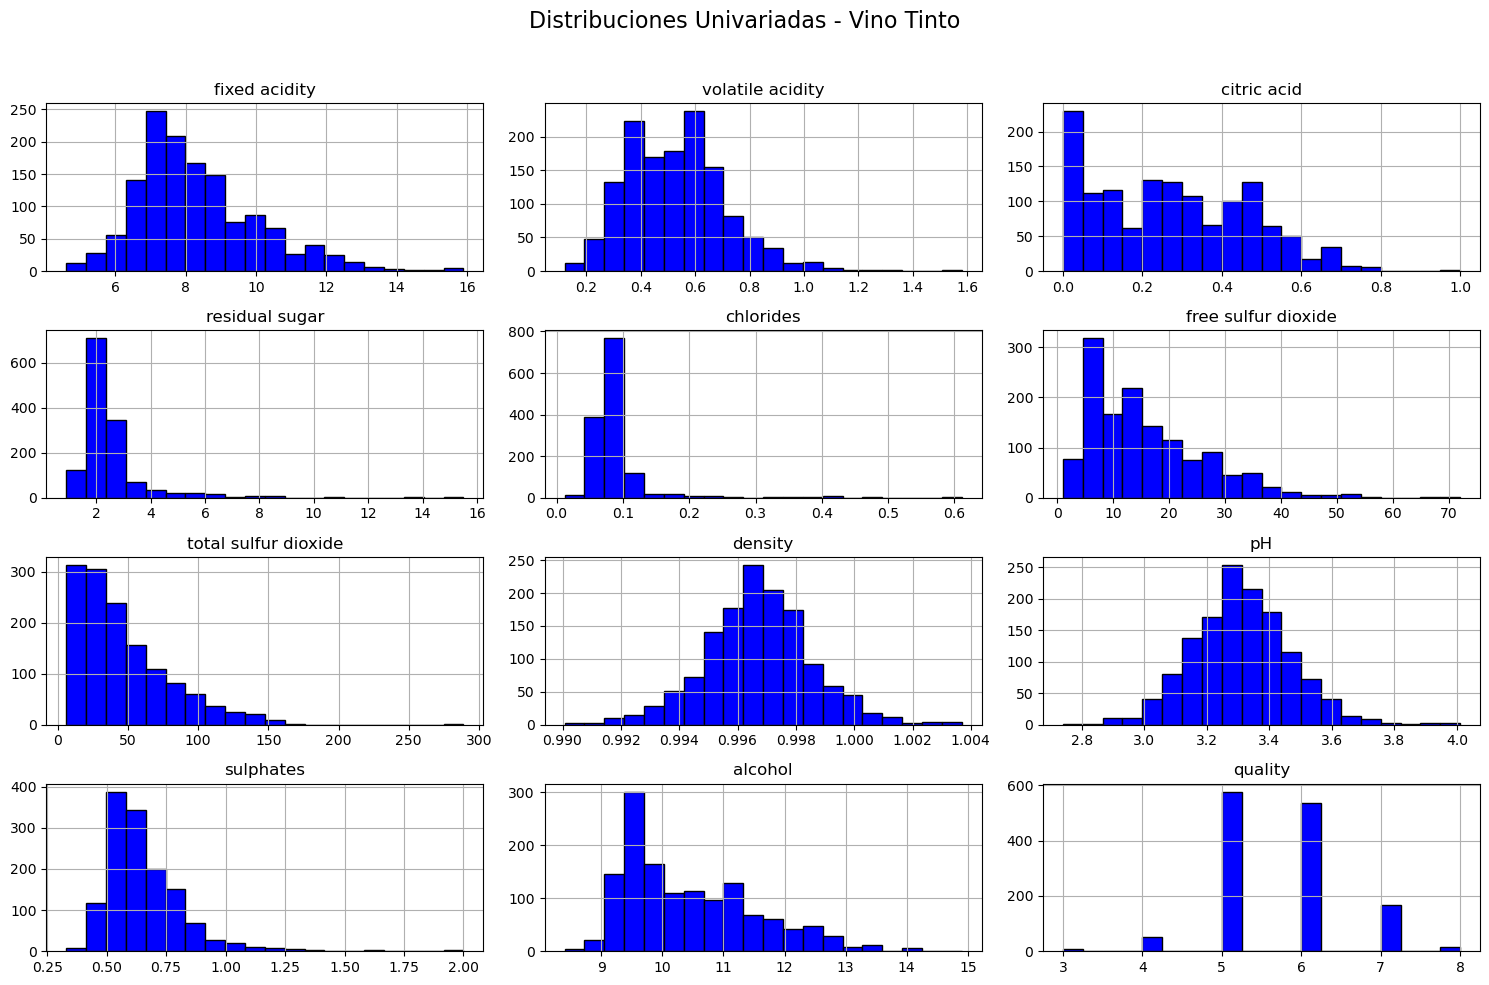

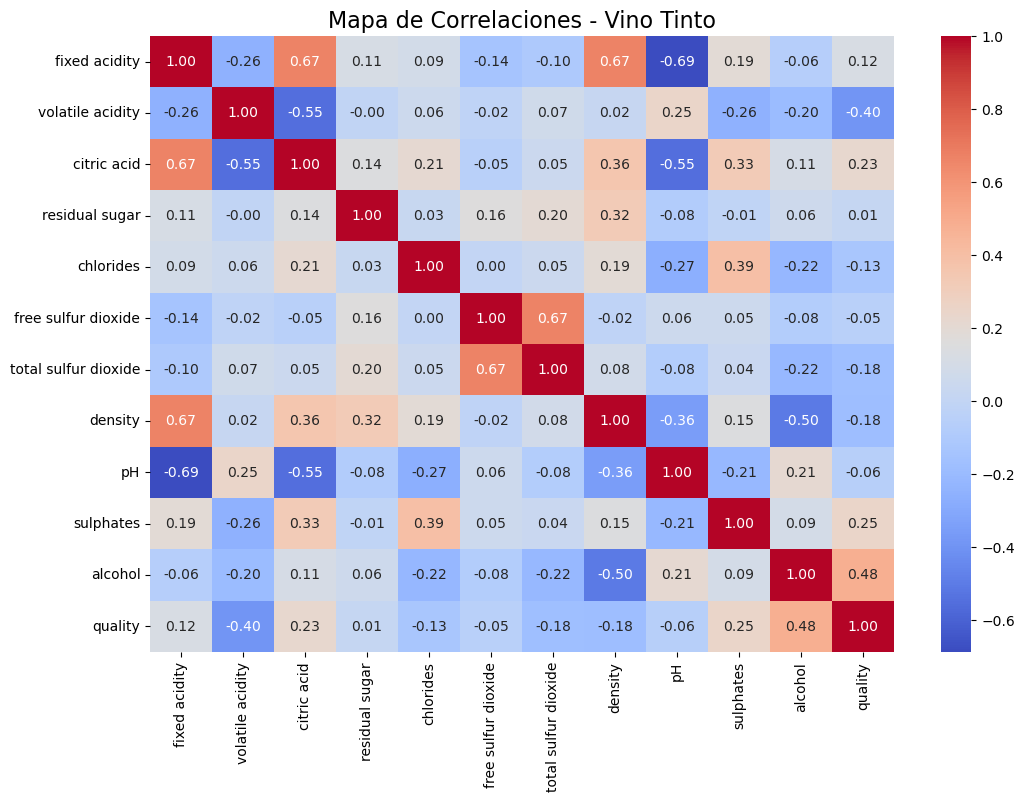

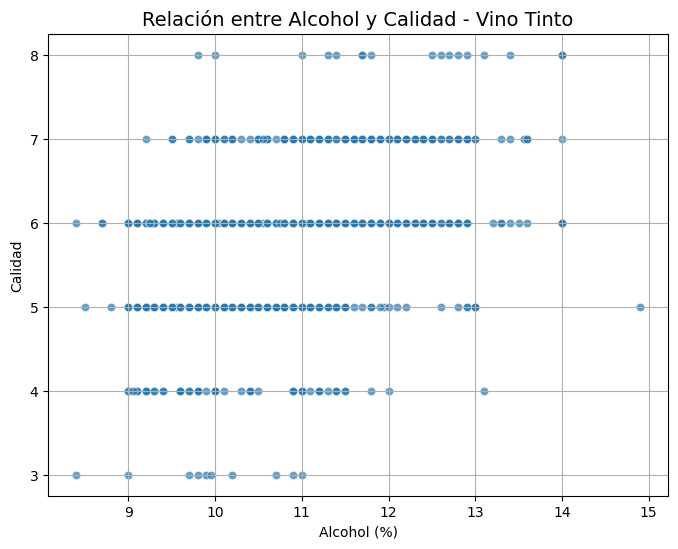

In [16]:
# Generar visualizaciones
visualizar_univariadas(df_red, title="Distribuciones Univariadas - Vino Tinto")
visualizar_multivariadas(df_red, title="Mapa de Correlaciones - Vino Tinto")
scatterplot_alcohol_quality(df_red, title="Relación entre Alcohol y Calidad - Vino Tinto")

1. Distribuciones Univariadas - Vino Tinto
Observaciones generales:
Las variables como fixed acidity, volatile acidity, citric acid y residual sugar muestran distribuciones asimétricas hacia la derecha (sesgo positivo), con un mayor número de valores en el extremo inferior.
density tiene una distribución muy concentrada, lo que sugiere que la densidad de los vinos es muy consistente en este dataset.
La variable alcohol tiene una distribución más extendida, con un rango notable desde 9% hasta casi 15%.
La variable objetivo quality tiene picos en 5 y 6, lo que sugiere que estas calificaciones son las más comunes. Los valores extremos de calidad (baja o alta) son menos frecuentes.
2. Mapa de Correlaciones - Vino Tinto
Relaciones clave:
alcohol muestra una correlación positiva moderada con quality (0.48), indicando que a mayor nivel de alcohol, la calidad tiende a ser más alta.
volatile acidity tiene una correlación negativa significativa con quality (-0.40), lo que indica que niveles altos de acidez volátil podrían estar asociados con una menor calidad.
Variables como citric acid y sulphates tienen correlaciones positivas débiles con quality.
density y quality tienen una correlación negativa leve, probablemente porque los vinos con mayor alcohol suelen tener menor densidad.
La fuerte correlación entre free sulfur dioxide y total sulfur dioxide (0.67) es esperada, ya que ambas miden componentes relacionados.
3. Relación entre Alcohol y Calidad
Patrón observado:
Existe una tendencia positiva clara: los vinos con mayor contenido de alcohol tienden a recibir mejores calificaciones de calidad.
La mayoría de los vinos con calidades más altas (7 y 8) tienen un nivel de alcohol superior al promedio.
Las calificaciones de calidad más bajas (3 y 4) están más concentradas en los niveles bajos de alcohol.


Conclusiones
1. Factores determinantes de calidad:

* alcohol y volatile acidity parecen ser variables clave para predecir la calidad del vino.
* Otras variables como citric acid y sulphates también tienen cierto impacto, aunque más limitado.
2. Distribución de calidad:

* La calidad está desbalanceada, con la mayoría de las muestras concentradas en calificaciones medianas (5 y 6). Esto puede requerir estrategias para manejar el desbalance en modelos de clasificación.

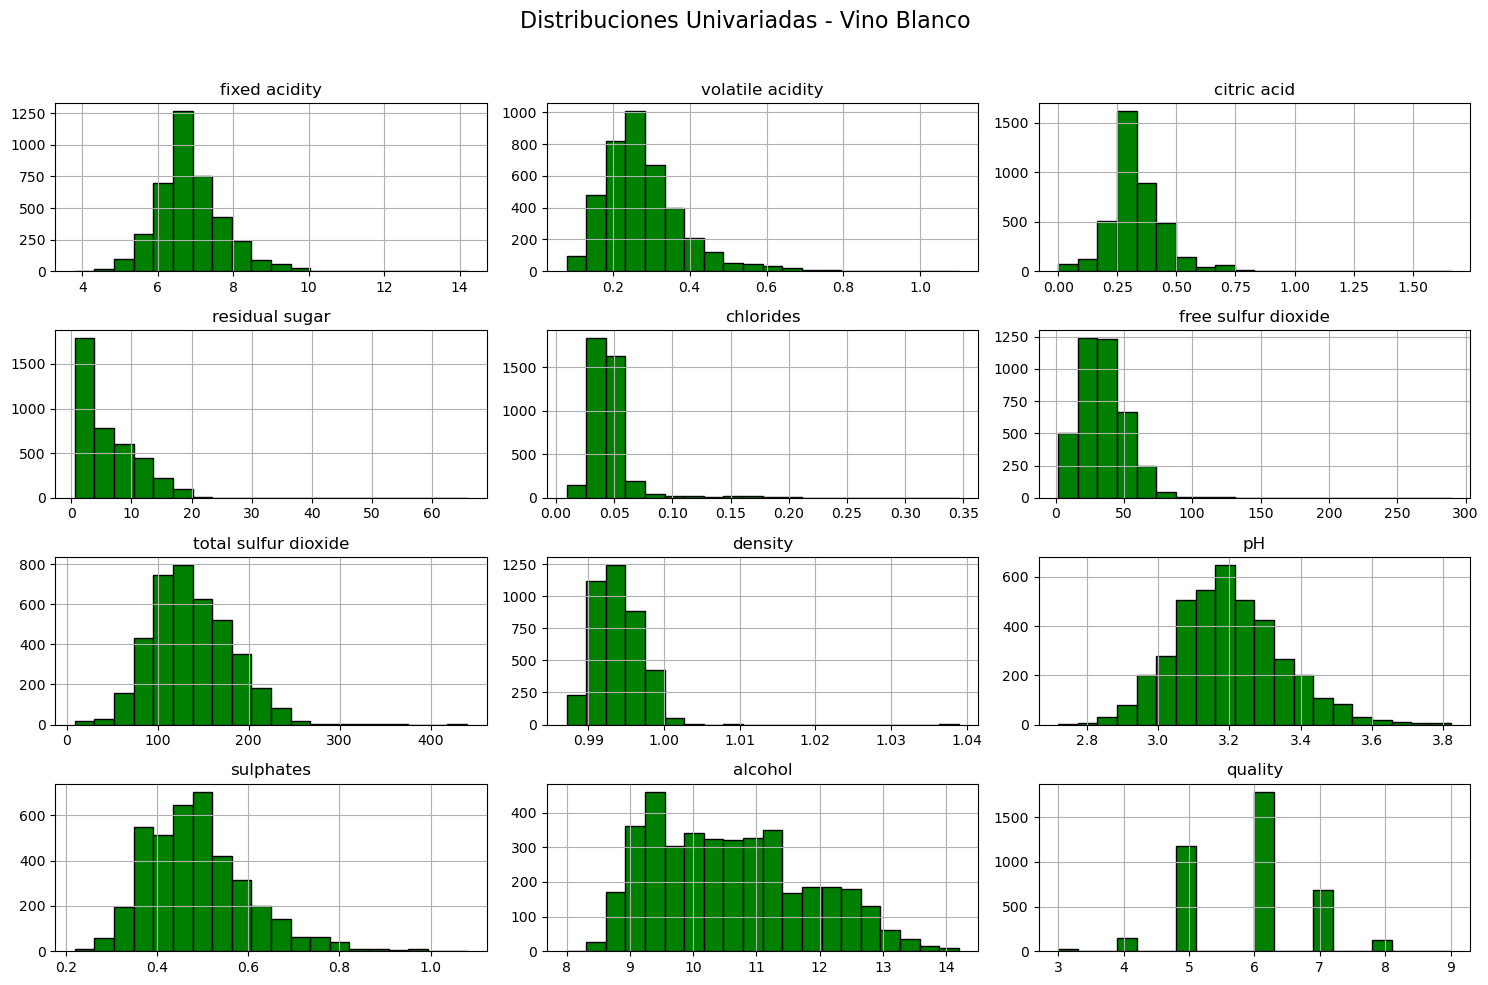

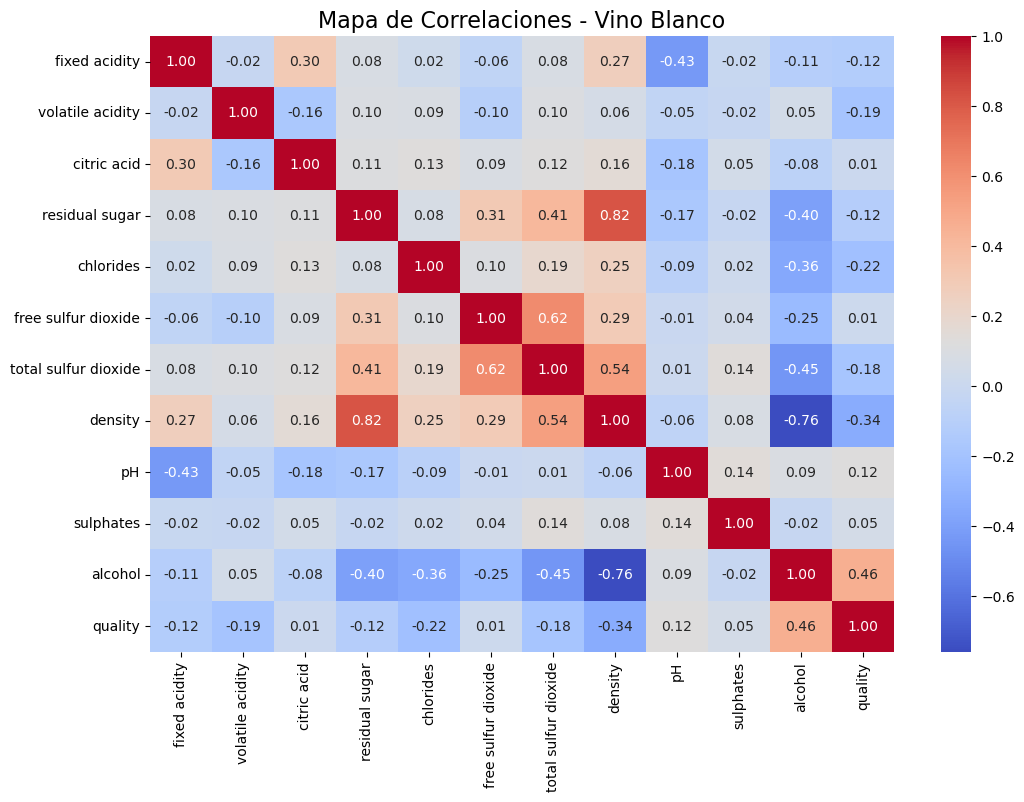

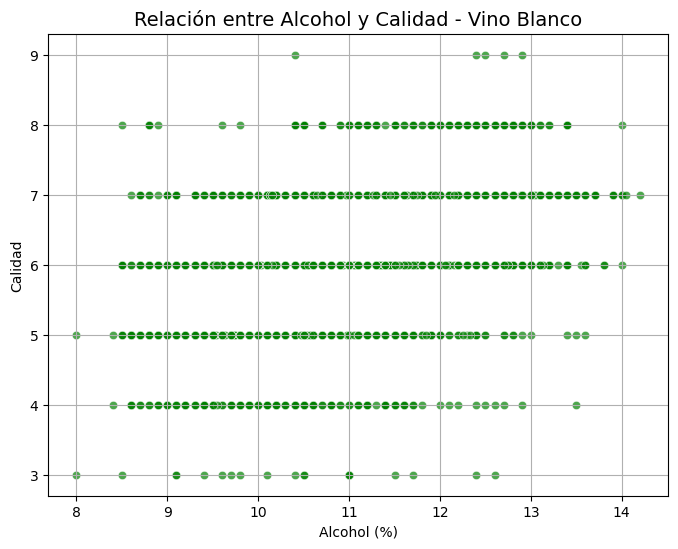

In [17]:
# Visualización univariada: histogramas
def visualizar_univariadas_white(df, title="Distribuciones Univariadas - Vino Blanco"):
    df.hist(bins=20, figsize=(15, 10), color='green', edgecolor='black')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Visualización multivariada: mapa de calor para correlaciones
def visualizar_multivariadas_white(df, title="Mapa de Correlaciones - Vino Blanco"):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title, fontsize=16)
    plt.show()

# Diagrama de dispersión entre alcohol y calidad
def scatterplot_alcohol_quality_white(df, title="Relación entre Alcohol y Calidad - Vino Blanco"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='alcohol', y='quality', alpha=0.7, color='green')
    plt.title(title, fontsize=14)
    plt.xlabel('Alcohol (%)')
    plt.ylabel('Calidad')
    plt.grid(True)
    plt.show()

# Generar visualizaciones
visualizar_univariadas_white(df_white)
visualizar_multivariadas_white(df_white)
scatterplot_alcohol_quality_white(df_white)

1. Distribuciones Univariadas - Vino Blanco
Observaciones generales:
La mayoría de las variables tienen distribuciones asimétricas (sesgo positivo), como residual sugar, chlorides, free sulfur dioxide, y total sulfur dioxide, lo que sugiere que hay valores extremos hacia la derecha.
density muestra una distribución muy concentrada, con poca variabilidad entre los valores.
alcohol tiene una distribución algo uniforme, con valores entre 8% y 14%.
La variable objetivo quality está más concentrada en las calificaciones 5, 6 y 7, con muy pocas observaciones en los extremos (3 y 9).
2. Mapa de Correlaciones - Vino Blanco
Relaciones clave:
alcohol tiene una correlación positiva moderada con quality (0.46), lo que indica que un mayor contenido de alcohol puede estar asociado con una mejor calidad.
volatile acidity tiene una correlación negativa con quality (-0.19), lo que sugiere que niveles más altos de acidez volátil están asociados con menor calidad.
Las variables residual sugar y density tienen una fuerte correlación entre sí (0.82), probablemente porque los azúcares residuales afectan directamente la densidad del vino.
total sulfur dioxide y free sulfur dioxide están fuertemente correlacionados (0.62), lo cual es esperado, ya que son medidas relacionadas del mismo compuesto.
3. Relación entre Alcohol y Calidad - Vino Blanco
Patrón observado:
Existe una clara tendencia positiva: los vinos con mayor contenido de alcohol tienden a tener mejores calificaciones de calidad.
Los vinos con calidades más altas (7, 8 y 9) están generalmente asociados con niveles más altos de alcohol.
Los vinos con calificaciones bajas (3 y 4) están concentrados en niveles más bajos de alcohol.


Conclusiones
1. Factores clave de calidad:

* alcohol y volatile acidity son variables importantes que influyen en la calidad del vino blanco.
* residual sugar y density muestran una fuerte correlación entre sí, pero tienen poca relación directa con la calidad.
2. Distribución de calidad:

Similar al vino tinto, la calidad está desbalanceada, con la mayoría de las muestras concentradas en calificaciones medias (5-7).

### Estadísticas descriptivas

In [18]:
def calcular_estadisticas_descriptivas(df):
    # Filtrar solo columnas numéricas
    df_numerico = df.select_dtypes(include=['number'])
    
    estadisticas = pd.DataFrame()
    estadisticas['Media'] = df_numerico.mean()
    estadisticas['Mediana'] = df_numerico.median()
    estadisticas['Moda'] = df_numerico.mode().iloc[0]  # Seleccionar la primera moda
    estadisticas['Rango'] = df_numerico.max() - df_numerico.min()
    estadisticas['Desviación Estándar'] = df_numerico.std()
    
    return estadisticas

# Calcular estadísticas descriptivas para vino tinto y blanco
estadisticas_red = calcular_estadisticas_descriptivas(df_red)
estadisticas_white = calcular_estadisticas_descriptivas(df_white)

# Calcular estadísticas descriptivas
estadisticas_red = calcular_estadisticas_descriptivas(df_red)
estadisticas_white = calcular_estadisticas_descriptivas(df_white)

In [19]:
estadisticas_red

,Media,Mediana,Moda,Rango,Desviación Estándar
fixed acidity,8.310596,7.9000,7.2000,11.30000,1.736990
volatile acidity,0.529478,0.5200,0.5000,1.46000,0.183031
citric acid,0.272333,0.2600,0.0000,1.00000,0.195537
residual sugar,2.523400,2.2000,2.0000,14.60000,1.352314
chlorides,0.088124,0.0790,0.0800,0.59900,0.049377
free sulfur dioxide,15.893304,14.0000,6.0000,71.00000,10.447270
total sulfur dioxide,46.825975,38.0000,28.0000,283.00000,33.408946
density,0.996709,0.9967,0.9968,0.01362,0.001869
pH,3.309787,3.3100,3.3000,1.27000,0.155036
sulphates,0.658705,0.6200,0.5400,1.67000,0.170667


In [20]:
estadisticas_white

,Media,Mediana,Moda,Rango,Desviación Estándar
fixed acidity,6.839346,6.8000,6.800,10.40000,0.866860
volatile acidity,0.280538,0.2600,0.280,1.02000,0.103437
citric acid,0.334332,0.3200,0.300,1.66000,0.122446
residual sugar,5.914819,4.7000,1.200,65.20000,4.861646
chlorides,0.045905,0.0420,0.036,0.33700,0.023103
free sulfur dioxide,34.889169,33.0000,29.000,287.00000,17.210021
total sulfur dioxide,137.193512,133.0000,111.000,431.00000,43.129065
density,0.993790,0.9935,0.992,0.05187,0.002905
pH,3.195458,3.1800,3.160,1.10000,0.151546
sulphates,0.490351,0.4800,0.500,0.86000,0.113523


## 3. Implementación de modelos

### Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).

### Vino Tinto

In [21]:
# Preparar datos: Clasificación binaria
df_red['quality_class'] = (df_red['quality'] >= 6).astype(int)  # 1: buena calidad, 0: mala calidad
X = df_red.drop(['quality', 'quality_class'], axis=1)
y = df_red['quality_class']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1: Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluación de Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_report = classification_report(y_test, y_pred_logreg)
print("Logistic Regression Results")
print("Accuracy:", logreg_accuracy)
print(logreg_report)

# Modelo 2: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluación de KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
print("\nKNN Results")
print("Accuracy:", knn_accuracy)
print(knn_report)

Logistic Regression Results
Accuracy: 0.7352941176470589
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       128
           1       0.76      0.73      0.74       144

    accuracy                           0.74       272
   macro avg       0.73      0.74      0.73       272
weighted avg       0.74      0.74      0.74       272


KNN Results
Accuracy: 0.6875
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       128
           1       0.69      0.74      0.72       144

    accuracy                           0.69       272
   macro avg       0.69      0.68      0.68       272
weighted avg       0.69      0.69      0.69       272



1. Logistic Regression
* Accuracy: 73.5%
* Precision:
    * Clase 0 (mala calidad): 71%
    * Clase 1 (buena calidad): 76%
* Recall:
    * Clase 0: 74% (buen balance para identificar la clase 0).
    * Clase 1: 73% (ligeramente menor).
* F1-Score:
    * Clase 0: 73%
    * Clase 1: 74%

Análisis:

Este modelo tiene un buen balance entre precisión y recall en ambas clases.
La precisión y recall están ligeramente sesgadas hacia la clase 1 (buena calidad), pero el modelo mantiene un rendimiento consistente.
El weighted average (promedio ponderado) del F1-score es 74%, lo que refleja el buen desempeño general del modelo.

2. K-Nearest Neighbors (KNN)
* Accuracy: 68.8%
* Precision:
    * Clase 0: 68%
    * Clase 1: 69%
* Recall:
    * Clase 0: 62% (baja capacidad para identificar muestras de clase 0).
    * Clase 1: 74% (mejor para identificar la clase 1).
* F1-Score:
    * Clase 0: 65%
    * Clase 1: 72%
Análisis:

Este modelo tiene un recall más alto para la clase 1 (buena calidad), pero su rendimiento para la clase 0 es más bajo.
La precisión entre clases está balanceada, pero el F1-score para la clase 0 es notablemente menor que el de la clase 1.
La accuracy general (68.8%) es significativamente menor que la de Logistic Regression.

 Conclusión Vino tinto
1. Logistic Regression es el modelo más adecuado para este dataset:

* Tiene mejor accuracy (73.5% vs. 68.8%).
* Logra un mejor balance entre las clases en todas las métricas.
* Su F1-score ponderado es más alto (74% vs. 69%).
2. KNN puede ser útil si prefieres maximizar el recall para la clase 1 (buena calidad), pero es menos efectivo en general para la clase 0.

### Vino blanco

In [22]:
# Preparar datos: Clasificación binaria
df_white['quality_class'] = (df_white['quality'] >= 6).astype(int)  # 1: buena calidad, 0: mala calidad
X_white = df_white.drop(['quality', 'quality_class'], axis=1)
y_white = df_white['quality_class']

# División en entrenamiento y prueba
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white, y_white, test_size=0.2, random_state=42, stratify=y_white
)

# Escalado de características
scaler = StandardScaler()
X_train_white_scaled = scaler.fit_transform(X_train_white)
X_test_white_scaled = scaler.transform(X_test_white)

# Modelo 1: Logistic Regression
logreg_white = LogisticRegression(random_state=42)
logreg_white.fit(X_train_white_scaled, y_train_white)
y_pred_logreg_white = logreg_white.predict(X_test_white_scaled)

# Evaluación del modelo Logistic Regression
logreg_accuracy_white = accuracy_score(y_test_white, y_pred_logreg_white)
logreg_report_white = classification_report(y_test_white, y_pred_logreg_white)
print("Logistic Regression Results (White Wine)")
print("Accuracy:", logreg_accuracy_white)
print(logreg_report_white)

# Modelo 2: KNN
knn_white = KNeighborsClassifier(n_neighbors=5)
knn_white.fit(X_train_white_scaled, y_train_white)
y_pred_knn_white = knn_white.predict(X_test_white_scaled)

# Evaluación del modelo KNN
knn_accuracy_white = accuracy_score(y_test_white, y_pred_knn_white)
knn_report_white = classification_report(y_test_white, y_pred_knn_white)
print("\nKNN Results (White Wine)")
print("Accuracy:", knn_accuracy_white)
print(knn_report_white)

Logistic Regression Results (White Wine)
Accuracy: 0.742749054224464
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       270
           1       0.78      0.85      0.81       523

    accuracy                           0.74       793
   macro avg       0.71      0.69      0.70       793
weighted avg       0.73      0.74      0.74       793


KNN Results (White Wine)
Accuracy: 0.7263556116015133
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       270
           1       0.78      0.82      0.80       523

    accuracy                           0.73       793
   macro avg       0.69      0.68      0.69       793
weighted avg       0.72      0.73      0.72       793



1. Logistic Regression
* Accuracy: 74.3%
* Precision:
    * Clase 0 (mala calidad): 65%
    * Clase 1 (buena calidad): 78%
* Recall:
    * Clase 0: 53% (baja capacidad para identificar la clase 0).
    * Clase 1: 85% (muy buena capacidad para identificar la clase 1).
* F1-Score:
    * Clase 0: 58% (limitado para esta clase).
    * Clase 1: 81% (destacado para esta clase).
Análisis:

Este modelo tiene un mejor rendimiento para la clase 1 (buena calidad), con un F1-Score alto (81%).
Sin embargo, su capacidad para identificar correctamente la clase 0 es limitada, con un recall bajo (53%) y un F1-Score de 58%.
El weighted average del F1-Score es 74%, mostrando un buen balance general.
2. K-Nearest Neighbors (KNN)
* Accuracy: 72.6%
* Precision:
    * Clase 0: 61%
    * Clase 1: 78%
* Recall:
    * Clase 0: 54% (mejor que Logistic Regression para esta clase).
    * Clase 1: 82% (ligeramente menor que Logistic Regression).
* F1-Score:
    * Clase 0: 57%
    * Clase 1: 80%
Análisis:

KNN tiene un rendimiento similar al de Logistic Regression, pero con una precisión y recall ligeramente menores para la clase 1.
Sin embargo, mejora marginalmente el recall para la clase 0, aunque sigue siendo bajo (54%).
El weighted average del F1-Score es 72%, ligeramente menor que Logistic Regression.

Conclusión Vino Blanco
1. Logistic Regression es el modelo más adecuado para este dataset:

* Tiene mejor accuracy (74.3% vs. 72.6%).
* Presenta un mejor rendimiento para la clase 1 (buena calidad) en todas las métricas.
* Su weighted average del F1-Score es más alto.
2. KNN es ligeramente mejor para identificar la clase 0 (mala calidad), con un recall de 54% frente a 53% de Logistic Regression, pero su rendimiento general es inferior.